In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import LabelEncoder

# Using 'SelectFromModel'

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

Classification Estimators: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_all_features = pd.read_csv('/content/drive/MyDrive/Repasse Gui/dataset_balanced/mean question/undersampling_balanced_2C.csv')

In [ ]:
df_all_features

,Unnamed: 0,Unnamed: 0.1,"Atualmente, alguém no seu domicílio tem algum trabalho remunerado?","Se sim, quantos trabalham?","Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)",Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?,cras,creas,A casa onde a família mora é:,Qual é o material predominante na construção das paredes externas no domicílio?,Qual é a forma de abastecimento de água utilizada no domicílio?,O domicílio possui água canalizada em pelo menos um cômodo?,A água utilizada para beber neste domicílio é:,"No domicílio, existe banheiro ou sanitário?",O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?,"Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?","Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?","Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?",O domicílio está localizado em área de conflito/violência?,ia level
0,0,0,0,0.0,0.371287,1,0,0,1,0,1,1,1,1,0,0,0,0,1,grave
1,1,1,0,0.0,0.330033,1,1,0,1,0,1,1,1,1,0,0,0,0,1,grave
2,2,2,0,0.0,0.396040,0,1,0,1,1,0,0,1,0,0,0,0,0,1,grave
3,3,3,0,0.0,0.580858,1,0,0,1,0,0,0,0,0,0,0,0,0,1,grave
4,4,4,0,0.0,0.825083,1,1,0,1,0,1,1,1,0,1,0,0,0,1,grave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20548,20548,20548,0,0.0,0.412541,0,1,0,1,0,0,0,0,1,0,0,0,0,1,não grave
20549,20549,20549,0,0.0,0.412541,1,1,0,1,0,1,1,1,1,1,0,0,0,1,não grave
20550,20550,20550,0,0.0,0.495050,1,0,0,1,1,1,1,1,1,1,0,1,0,1,não grave
20551,20551,20551,0,0.0,1.000000,1,1,0,1,1,0,0,1,0,1,0,0,1,1,não grave


In [ ]:
X_sanity_check = df_all_features.drop(["Unnamed: 0", "Unnamed: 0.1", "ia level"], axis=1)
y = df_all_features["ia level"]

## Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’. (Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers.)

In [ ]:
from sklearn.linear_model import LogisticRegression

Teste mínimo para ver se o estimador obtem o que gerou o Y

In [ ]:
sfm_selector = SelectFromModel(estimator=LogisticRegression(max_iter=10000))
sfm_selector.fit(X_sanity_check, y)

print(f"Average Accuracy: {sfm_selector.estimator_.score(X_sanity_check, y)}")
print(f"Main features:")
display(X_sanity_check.columns[sfm_selector.get_support()])
# plot_importance(importances=sfm_selector.estimator_.coef_, features=sfm_selector.feature_names_in_)

Average Accuracy: 0.6124653335279521
Main features:


Index(['Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'creas', 'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

In [ ]:
X = X_sanity_check

### Top n features

In [ ]:
sfm_selector = SelectFromModel(estimator=LogisticRegression(max_iter=10000))
display(sfm_selector.get_params())
sfm_selector.fit(X, y)

print(f"Average Accuracy: {sfm_selector.estimator_.score(X, y)}")
print(f"Main features:")
display(X.columns[sfm_selector.get_support()])
# plot_importance(importances=sfm_selector.estimator_.coef_, features=sfm_selector.feature_names_in_)

{'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 10000,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(max_iter=10000),
 'importance_getter': 'auto',
 'max_features': None,
 'norm_order': 1,
 'prefit': False,
 'threshold': None}

Average Accuracy: 0.6124653335279521
Main features:


Index(['Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'creas', 'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

## LogisticRegressionCV

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV

This class implements logistic regression using liblinear, newton-cg, sag of lbfgs optimizer. The newton-cg, sag and lbfgs solvers support only L2 regularization with primal formulation. The liblinear solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty. Elastic-Net penalty is only supported by the saga solver.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

estimator = LogisticRegressionCV(max_iter=10000)

### Top n features

In [ ]:
sfm_selector = SelectFromModel(estimator=estimator)
display(sfm_selector.get_params())
sfm_selector.fit(X, y)

print(f"Average Accuracy: {sfm_selector.estimator_.score(X, y)}")
print(f"Main features:")
display(X.columns[sfm_selector.get_support()])
# plot_importance(importances=sfm_selector.estimator_.coef_, features=sfm_selector.feature_names_in_)

{'estimator__Cs': 10,
 'estimator__class_weight': None,
 'estimator__cv': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1.0,
 'estimator__l1_ratios': None,
 'estimator__max_iter': 10000,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__refit': True,
 'estimator__scoring': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator': LogisticRegressionCV(max_iter=10000),
 'importance_getter': 'auto',
 'max_features': None,
 'norm_order': 1,
 'prefit': False,
 'threshold': None}

Average Accuracy: 0.6124653335279521
Main features:


Index(['Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'creas', 'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

## PassiveAggressiveClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html#sklearn.linear_model.PassiveAggressiveClassifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

estimator = PassiveAggressiveClassifier(max_iter=10000)

### Top n features

In [ ]:
sfm_selector = SelectFromModel(estimator=estimator)
display(sfm_selector.get_params())
sfm_selector.fit(X, y)

print(f"Average Accuracy: {sfm_selector.estimator_.score(X, y)}")
print(f"Main features:")
display(X.columns[sfm_selector.get_support()])
# plot_importance(importances=sfm_selector.estimator_.coef_, features=sfm_selector.feature_names_in_)

{'estimator__C': 1.0,
 'estimator__average': False,
 'estimator__class_weight': None,
 'estimator__early_stopping': False,
 'estimator__fit_intercept': True,
 'estimator__loss': 'hinge',
 'estimator__max_iter': 10000,
 'estimator__n_iter_no_change': 5,
 'estimator__n_jobs': None,
 'estimator__random_state': None,
 'estimator__shuffle': True,
 'estimator__tol': 0.001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': PassiveAggressiveClassifier(max_iter=10000),
 'importance_getter': 'auto',
 'max_features': None,
 'norm_order': 1,
 'prefit': False,
 'threshold': None}

Average Accuracy: 0.48007590132827327
Main features:


Index(['Se sim, quantos trabalham?', 'cras',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

## Perceptron

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

estimator = Perceptron(max_iter=10000)

### Top n features

In [ ]:
sfm_selector = SelectFromModel(estimator=estimator)
display(sfm_selector.get_params())
sfm_selector.fit(X, y)

print(f"Average Accuracy: {sfm_selector.estimator_.score(X, y)}")
print(f"Main features:")
display(X.columns[sfm_selector.get_support()])
# plot_importance(importances=sfm_selector.estimator_.coef_, features=sfm_selector.feature_names_in_)

{'estimator__alpha': 0.0001,
 'estimator__class_weight': None,
 'estimator__early_stopping': False,
 'estimator__eta0': 1.0,
 'estimator__fit_intercept': True,
 'estimator__l1_ratio': 0.15,
 'estimator__max_iter': 10000,
 'estimator__n_iter_no_change': 5,
 'estimator__n_jobs': None,
 'estimator__penalty': None,
 'estimator__random_state': 0,
 'estimator__shuffle': True,
 'estimator__tol': 0.001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': Perceptron(max_iter=10000),
 'importance_getter': 'auto',
 'max_features': None,
 'norm_order': 1,
 'prefit': False,
 'threshold': None}

Average Accuracy: 0.4794920449569406
Main features:


Index(['Se sim, quantos trabalham?', 'creas', 'A casa onde a família mora é:',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

## RidgeClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier

In [ ]:
from sklearn.linear_model import RidgeClassifier

estimator = RidgeClassifier(max_iter=10000)

### Top n features

In [ ]:
sfm_selector = SelectFromModel(estimator=estimator)
display(sfm_selector.get_params())
sfm_selector.fit(X, y)

print(f"Average Accuracy: {sfm_selector.estimator_.score(X, y)}")
print(f"Main features:")
display(X.columns[sfm_selector.get_support()])
# plot_importance(importances=sfm_selector.estimator_.coef_, features=sfm_selector.feature_names_in_)

{'estimator__alpha': 1.0,
 'estimator__class_weight': None,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 10000,
 'estimator__normalize': 'deprecated',
 'estimator__positive': False,
 'estimator__random_state': None,
 'estimator__solver': 'auto',
 'estimator__tol': 0.001,
 'estimator': RidgeClassifier(max_iter=10000),
 'importance_getter': 'auto',
 'max_features': None,
 'norm_order': 1,
 'prefit': False,
 'threshold': None}

Average Accuracy: 0.6122707147375079
Main features:


Index(['Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'creas', 'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

## RidgeClassifierCV

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html#sklearn.linear_model.RidgeClassifierCV

In [ ]:
from sklearn.linear_model import RidgeClassifierCV

estimator = RidgeClassifierCV()

### Top n features

In [ ]:
sfm_selector = SelectFromModel(estimator=estimator)
display(sfm_selector.get_params())
sfm_selector.fit(X, y)

print(f"Average Accuracy: {sfm_selector.estimator_.score(X, y)}")
print(f"Main features:")
display(X.columns[sfm_selector.get_support()])
# plot_importance(importances=sfm_selector.estimator_.coef_, features=sfm_selector.feature_names_in_)

{'estimator__alphas': array([ 0.1,  1. , 10. ]),
 'estimator__class_weight': None,
 'estimator__cv': None,
 'estimator__fit_intercept': True,
 'estimator__normalize': 'deprecated',
 'estimator__scoring': None,
 'estimator__store_cv_values': False,
 'estimator': RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ])),
 'importance_getter': 'auto',
 'max_features': None,
 'norm_order': 1,
 'prefit': False,
 'threshold': None}

Average Accuracy: 0.6124653335279521
Main features:


Index(['Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'creas', 'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

## SGDClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier

estimator = SGDClassifier(max_iter=10000)

### Top n features

In [ ]:
sfm_selector = SelectFromModel(estimator=estimator)
display(sfm_selector.get_params())
sfm_selector.fit(X, y)

print(f"Average Accuracy: {sfm_selector.estimator_.score(X, y)}")
print(f"Main features:")
display(X.columns[sfm_selector.get_support()])
# plot_importance(importances=sfm_selector.estimator_.coef_, features=sfm_selector.feature_names_in_)

{'estimator__alpha': 0.0001,
 'estimator__average': False,
 'estimator__class_weight': None,
 'estimator__early_stopping': False,
 'estimator__epsilon': 0.1,
 'estimator__eta0': 0.0,
 'estimator__fit_intercept': True,
 'estimator__l1_ratio': 0.15,
 'estimator__learning_rate': 'optimal',
 'estimator__loss': 'hinge',
 'estimator__max_iter': 10000,
 'estimator__n_iter_no_change': 5,
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__power_t': 0.5,
 'estimator__random_state': None,
 'estimator__shuffle': True,
 'estimator__tol': 0.001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': SGDClassifier(max_iter=10000),
 'importance_getter': 'auto',
 'max_features': None,
 'norm_order': 1,
 'prefit': False,
 'threshold': None}

Average Accuracy: 0.6089621952999562
Main features:


Index(['Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'creas',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

## SGDOneClassSVM

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDOneClassSVM.html#sklearn.linear_model.SGDOneClassSVM

In [ ]:
from sklearn.linear_model import SGDOneClassSVM

estimator = SGDOneClassSVM(max_iter=10000)

### Top n features

In [ ]:
sfm_selector = SelectFromModel(estimator=estimator)
display(sfm_selector.get_params())
sfm_selector.fit(X, y)

# print(f"Average Accuracy: {sfm_selector.estimator_.score(X, y)}")
print(f"Main features:")
display(X.columns[sfm_selector.get_support()])
plot_importance(importances=sfm_selector.estimator_.coef_, features=sfm_selector.feature_names_in_)

{'estimator__average': False,
 'estimator__eta0': 0.0,
 'estimator__fit_intercept': True,
 'estimator__learning_rate': 'optimal',
 'estimator__max_iter': 10000,
 'estimator__nu': 0.5,
 'estimator__power_t': 0.5,
 'estimator__random_state': None,
 'estimator__shuffle': True,
 'estimator__tol': 0.001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': SGDOneClassSVM(max_iter=10000),
 'importance_getter': 'auto',
 'max_features': None,
 'norm_order': 1,
 'prefit': False,
 'threshold': None}

Main features:


Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'A casa onde a família mora é:',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

NameError: ignored

# Boruta Model Selection

Info: https://towardsdatascience.com/feature-selection-you-are-probably-doing-it-wrong-985679b41456

https://github.com/smazzanti/tds_feature_selection_you_are_probably_doing_it_wrong/blob/main/tds_feature_selection_you_are_probably_doing_it_wrong.ipynb

In [ ]:
!pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.5 MB/s 


In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest = RandomForestRegressor(n_jobs = -1, max_depth = 5)

In [ ]:
df_all_features['ia level'] = df_all_features['ia level'].replace(['grave', 'não grave'], [0, 1])

In [ ]:
import numpy as np
boruta_selector = BorutaPy(forest, n_estimators = 'auto', random_state = 0)
boruta_selector.fit(np.array(X), np.array(df_all_features["ia level"]))

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=97,
                                         n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x7F9B2E0D4AF0),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F9B2E0D4AF0)

In [ ]:
feature_names = X.columns
# store results
boruta_ranking = boruta_selector.ranking_
selected_features = np.array(feature_names)[boruta_ranking <= 2]
selected_features

array(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype=object)

In [ ]:
# print(f"Average Accuracy: {boruta_selector.estimator.score(np.array(X), np.array(df_all_features["Y"]))}")
# np.array(X), np.array(df_all_features["Y"])

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  from ipykernel import kernelapp as app


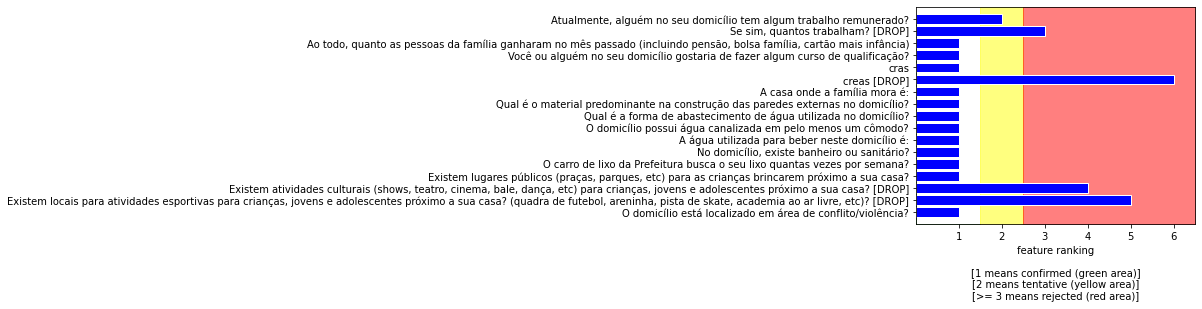

In [ ]:
fig, ax = plt.subplots(figsize = (5, 4))

ax.barh(range(len(feature_names)), boruta_ranking, color = 'blue', edgecolor = 'white')
ax.fill_between([0, 1.5, -1], len(feature_names), color='green', alpha = .5)
ax.fill_between([1.5, 2.5], -1, len(feature_names), color = 'yellow', alpha = .5)
ax.fill_between([2.5, 13], -1, len(feature_names), color = 'red', alpha = .5)
ax.set_yticks(range(len(feature_names)))
ax.set_yticklabels([feature_name + ' [DROP]' if boruta_ranking[i] > 2 else feature_name for i, feature_name in enumerate(feature_names)])
ax.set_xlim(0, boruta_ranking.max() + .5)
ax.set_ylim(-1, len(feature_names))
ax.set_xticks(range(1, boruta_ranking.max() + 1))
ax.set_xlabel('feature ranking\n\n[1 means confirmed (green area)]\n[2 means tentative (yellow area)]\n[>= 3 means rejected (red area)]')
ax.invert_yaxis()

plt.tight_layout()

# SFS (Forward and Backward)

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

## RidgeClassifier

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeClassifier

estimator = RidgeClassifier(max_iter=10000)

### Forward

In [ ]:
y = df_all_features['ia level']

In [ ]:

sfs_selector = SequentialFeatureSelector(estimator=estimator, n_features_to_select = 4, cv =10)
sfs_selector.fit(X, y)

# print(f"Average Accuracy: {sfs_selector.estimator.score(X, y)}")
print(f"Main features:")
display(sfs_selector.estimator.get_params())
display(X.columns[sfs_selector.get_support()])

# plot_importance(importances=sfs_selector.estimator.coef_, features=sfs_selector.feature_names_in_)

Main features:


{'alpha': 1.0,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 10000,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'No domicílio, existe banheiro ou sanitário?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

In [ ]:
sfs_selector = SequentialFeatureSelector(estimator=estimator, cv =10)
sfs_selector.fit(X, y)

print(f"Main features:")
display(sfs_selector.estimator.get_params())
display(X.columns[sfs_selector.get_support()])

Main features:


{'alpha': 1.0,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 10000,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'creas',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

### Backward

In [ ]:
sfs_selector = SequentialFeatureSelector(estimator=estimator, n_features_to_select = 4, cv =10, direction ='backward')
sfs_selector.fit(X, y)
X.columns[sfs_selector.get_support()]

print(f"Main features:")
display(sfs_selector.estimator.get_params())
display(X.columns[sfs_selector.get_support()])

Main features:


{'alpha': 1.0,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 10000,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'cras', 'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?'],
      dtype='object')

In [ ]:
sfs_selector = SequentialFeatureSelector(estimator=estimator, cv =10, direction ='backward')
sfs_selector.fit(X, y)
X.columns[sfs_selector.get_support()]

print(f"Main features:")
display(sfs_selector.estimator.get_params())
display(X.columns[sfs_selector.get_support()])

Main features:


{'alpha': 1.0,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 10000,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression(max_iter=10000)

### Forward

In [ ]:
sfs_selector = SequentialFeatureSelector(estimator=estimator, n_features_to_select = 4, cv =10)
sfs_selector.fit(X, y)

print(f"Main features:")
display(sfs_selector.estimator.get_params())
display(X.columns[sfs_selector.get_support()])

Main features:


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Index(['creas', 'O domicílio possui água canalizada em pelo menos um cômodo?',
       'No domicílio, existe banheiro ou sanitário?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

In [ ]:
sfs_selector = SequentialFeatureSelector(estimator=estimator, cv =10)
sfs_selector.fit(X, y)

print(f"Main features:")
display(sfs_selector.estimator.get_params())
display(X.columns[sfs_selector.get_support()])

Main features:


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'creas',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

### Backward

In [ ]:
# Took 1h to run this cell

sfs_selector = SequentialFeatureSelector(estimator=estimator, n_features_to_select = 4, cv =10, direction ='backward', n_jobs=-1)
sfs_selector.fit(X, y)

print(f"Main features:")
display(sfs_selector.estimator.get_params())
display(X.columns[sfs_selector.get_support()])

Main features:


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Index(['Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?'],
      dtype='object')

In [ ]:
#Took 45min to run
sfs_selector = SequentialFeatureSelector(estimator=estimator, cv =10, direction ='backward', n_jobs=-1)
sfs_selector.fit(X, y)

print(f"Main features:")
display(sfs_selector.estimator.get_params())
display(X.columns[sfs_selector.get_support()])

Main features:


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Index(['Se sim, quantos trabalham?',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

#Select K Best

## Chi2
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### 1

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=1)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 1,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['O domicílio possui água canalizada em pelo menos um cômodo?'], dtype='object')

### 2

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=2)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 2,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['O domicílio possui água canalizada em pelo menos um cômodo?', 'A água utilizada para beber neste domicílio é:'], dtype='object')

###3

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=3)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 3,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Qual é o material predominante na construção das paredes externas no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:'],
      dtype='object')

###4

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=4)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 4,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Qual é o material predominante na construção das paredes externas no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###5

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=5)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 5,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Qual é o material predominante na construção das paredes externas no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###6

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=6)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 6,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###7

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=7)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 7,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['cras',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###8

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=8)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 8,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'cras',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###9

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=9)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 9,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'cras',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###10

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=10)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 10,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'cras',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###11

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=11)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 11,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'cras', 'creas',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###12

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=12)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 12,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###13

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=13)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 13,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pi

###14

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=14)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 14,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pi

###15

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=15)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 15,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Exi

###16

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=16)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 16,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescen

###17

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=17)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 17,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) 

## F_classif
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

###1

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=1)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 1,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['O domicílio possui água canalizada em pelo menos um cômodo?'], dtype='object')

###2

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=2)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 2,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['O domicílio possui água canalizada em pelo menos um cômodo?', 'A água utilizada para beber neste domicílio é:'], dtype='object')

###3

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=3)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 3,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?'],
      dtype='object')

###4

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=4)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 4,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Qual é o material predominante na construção das paredes externas no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?'],
      dtype='object')

###5

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=5)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 5,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?'],
      dtype='object')

###6

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=6)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 6,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?'],
      dtype='object')

###7

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=7)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 7,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

###8

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=8)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 8,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

###9

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=9)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 9,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

###10

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=10)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 10,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'cras',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

###11

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=11)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 11,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'cras',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

###12

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=12)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 12,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'cras',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?',
       'O domicílio está localizado em área de conflito/violênci

###13

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=13)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 13,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'cras',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?',
       'O domicílio está lo

###14

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=14)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 14,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de fut

###15

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=15)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 15,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quad

###16

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=16)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 16,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescen

###17

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=17)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 17,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) 

# Recursive Feature Elimination (RFE)

## Decision Tree Classifier

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

###1

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=1)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 1,
 'step': 1,
 'verbose': 0}

Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)'], dtype='object')

###2

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=1)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=2)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 1,
 'step': 1,
 'verbose': 0}

Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)'], dtype='object')

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 2,
 'step': 1,
 'verbose': 0}

Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)', 'O domicílio possui água canalizada em pelo menos um cômodo?'], dtype='object')

###3

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 3,
 'step': 1,
 'verbose': 0}

Index(['Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'O domicílio possui água canalizada em pelo menos um cômodo?'],
      dtype='object')

###4

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=4)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 4,
 'step': 1,
 'verbose': 0}

Index(['Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?'],
      dtype='object')

###5

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 5,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?'],
      dtype='object')

###6

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=6)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 6,
 'step': 1,
 'verbose': 0}

Index(['Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'A casa onde a família mora é:',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?'],
      dtype='object')

###7

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 7,
 'step': 1,
 'verbose': 0}

Index(['Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###8

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=8)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 8,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###9

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=9)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 9,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'A casa onde a família mora é:',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###10

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 10,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

###11

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=11)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 11,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate,

###12

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=12)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 12,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate,

###13

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=13)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 13,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista d

###14

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=14)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 14,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianç

###15

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=15)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 15,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       

###16

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=16)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 16,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para cria

###17

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=17)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 17,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) 